# Task 2: Diffusion Maps

## Part 2: Swiss roll manifold
In this part we will examine the data set given by:
<img src="https://latex.codecogs.com/svg.latex?X=\left\{x_{k}&space;\in&space;\mathbb{R}^{3}\right\}_{k=1}^{N},&space;x_{k}=(u&space;\cos&space;(u),&space;v,&space;u&space;\sin&space;(u)),&space;(u,v)&space;\in&space;[0,10]^2" title="X=\left\{x_{k} \in \mathbb{R}^{3}\right\}_{k=1}^{N}, x_{k}=(u \cos (u), v, u \sin (u)), (u,v) \in [0,10]^2" />

In [1]:
import sw.swiss_roll_data_set as data
from sw.diffusion_map import *
from sw.pca import *

from matplotlib import pyplot as plt

## Generate data set and format to numpy N = 5000

In [29]:
N = 5000

In [30]:
data.generate_csv(N)

In [31]:
data_points,color = data.read_csv()

## Visualize Swiss roll

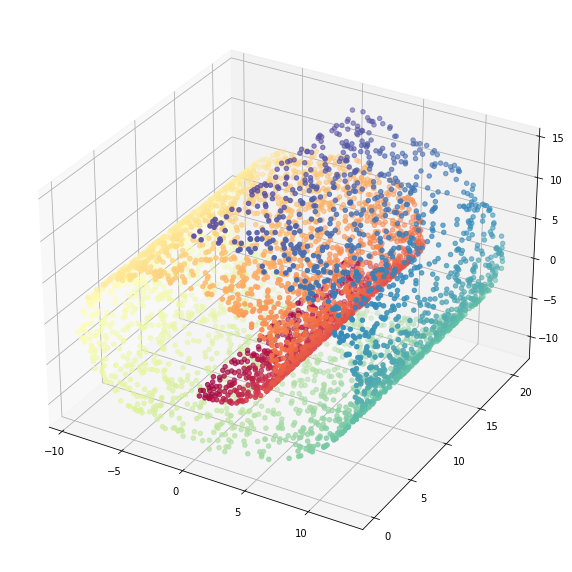

In [32]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_points[:,0],data_points[:,1],data_points[:,2],c=color,cmap=plt.cm.Spectral)

## Obtain eigenfunctions by using Diffusion Maps algorithm

In [33]:
eta = 0.05
l = 10
# 1 min running time
ll, eig_func = diffusion_map(eta,l,data_points)

## Plot the first eigenfunction against the other eigenfunctions

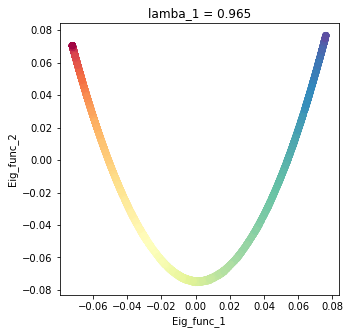

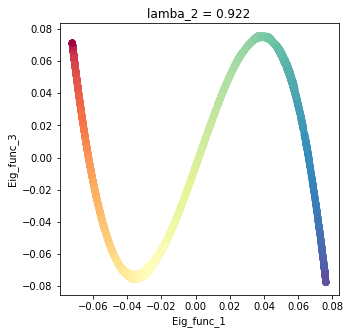

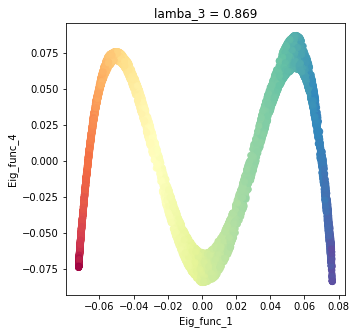

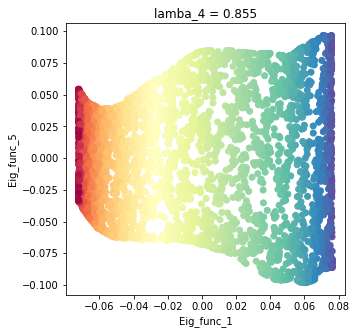

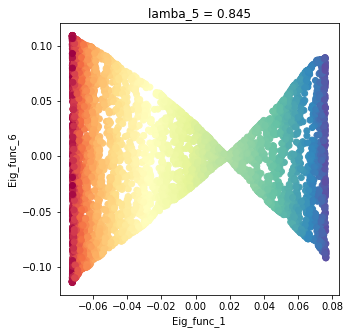

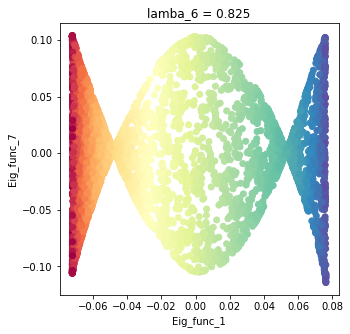

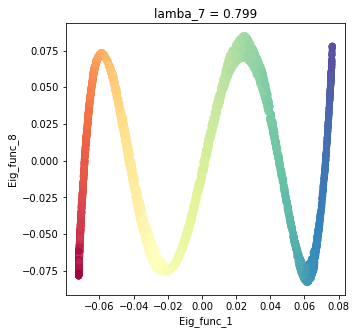

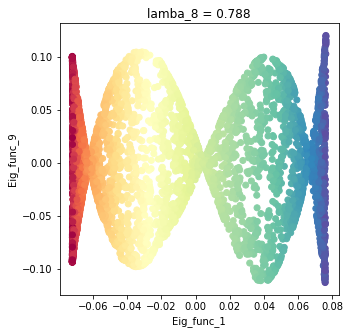

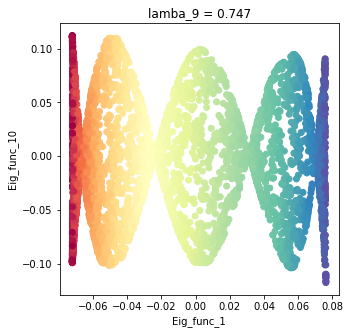

In [34]:
for i in range(1,l):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(eig_func[:,0],eig_func[:,i],c=color, cmap=plt.cm.Spectral)
    plt.ylabel(f"Eig_func_{i+1}")
    plt.xlabel("Eig_func_1")
    plt.title(f"lamba_{i} = {np.round(ll[i],3)}")

## Analysing principal components

1.0
0.7113220374913826


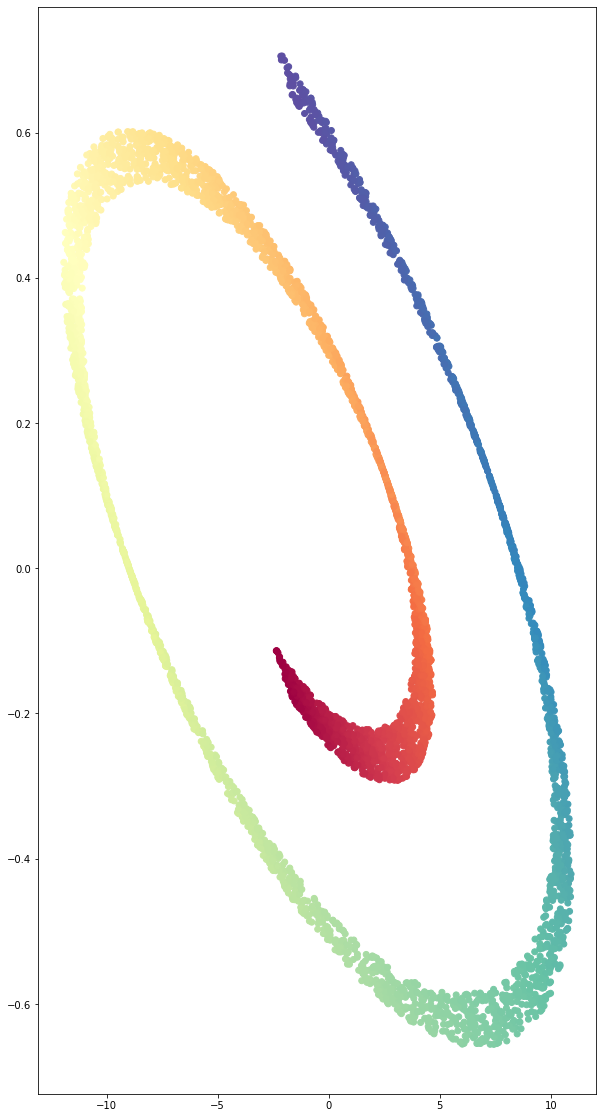

In [8]:
# Visualizing with two pc
num_pc = 2
U, _, Vt, sigma = pca(data_points,num_pc)
data_pca = U@sigma@Vt

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot()
ax.scatter(data_pca[:,0],data_pca[:,1],c=color,cmap=plt.cm.Spectral)

# Energy calculation: 
energy3 = np.sum(energy_pca(data_points,3))
print(energy3)
energy2 = np.sum(energy_pca(data_points,2))
print(energy2)

## Repeat analysis for N = 1000

In [9]:
N = 1000

In [23]:
data.generate_csv(N)

In [24]:
data_points,color = data.read_csv()

In [25]:
eta = 0.05
l = 10
ll, eig_func = diffusion_map(eta,l,data_points)

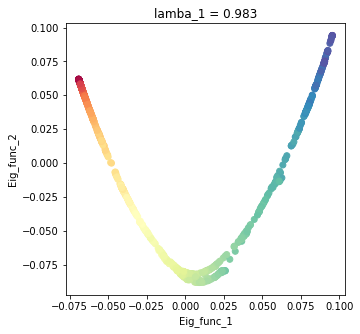

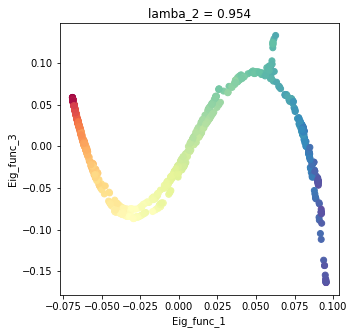

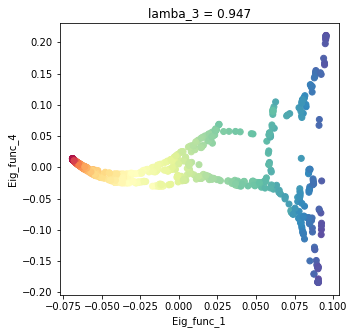

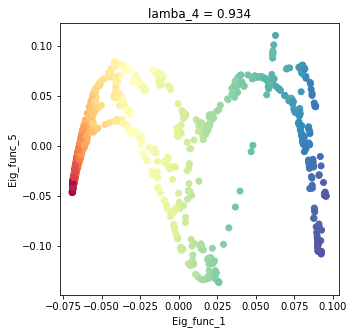

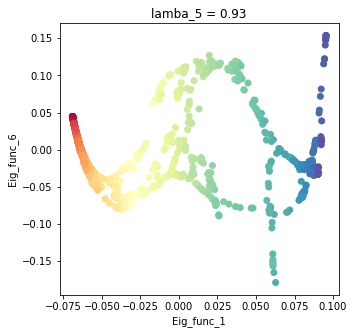

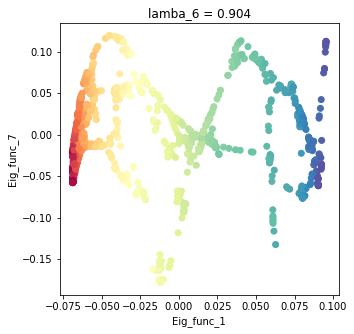

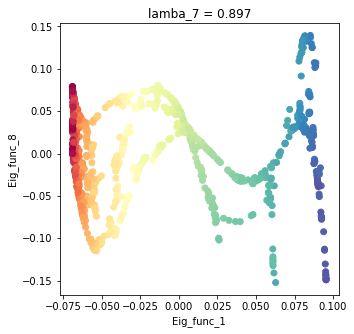

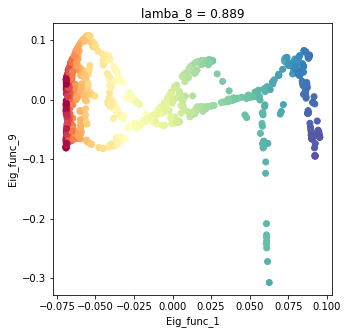

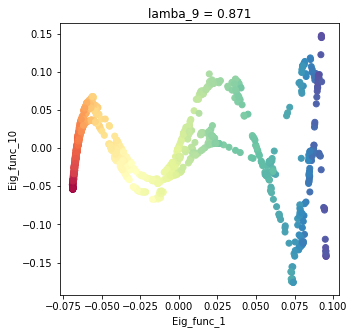

In [28]:
for i in range(1,l):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(eig_func[:,0],eig_func[:,i],c=color, cmap=plt.cm.Spectral)
    plt.ylabel(f"Eig_func_{i+1}")
    plt.xlabel("Eig_func_1")
    plt.title(f"lamba_{i} = {np.round(ll[i],3)}")

1.0
0.7272681164273763


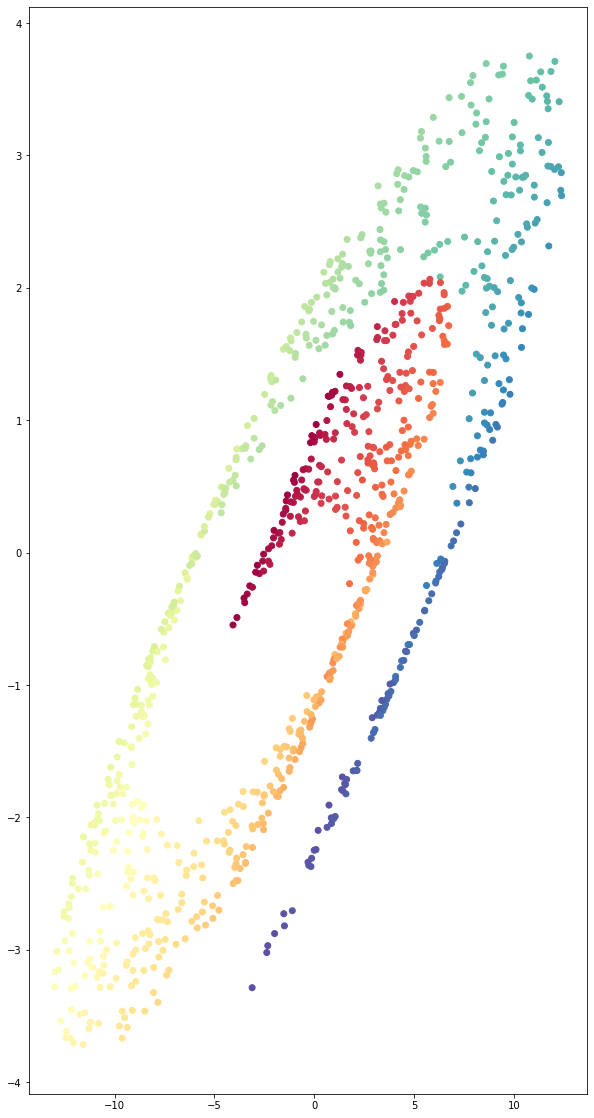

In [18]:
num_pc = 2
U, _, Vt, sigma = pca(data_points,num_pc)
data_pca = U@sigma@Vt

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot()
ax.scatter(data_pca[:,0],data_pca[:,1],c=color,cmap=plt.cm.Spectral)

energy3 = np.sum(energy_pca(data_points,3))
print(energy3)
energy2 = np.sum(energy_pca(data_points,2))
print(energy2)